In [2]:
!pip install zipfile36

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import zipfile36 as zipfile

In [4]:
from google.colab import files
uploaded = files.upload()

Saving digit-recognizer.zip to digit-recognizer.zip


In [7]:
zip_ref = zipfile.ZipFile('/content/digit-recognizer.zip', 'r')
zip_ref.extractall('/content/mnist')
zip_ref.close()

In [8]:
# Charger les données d'entraînement et de test depuis les fichiers CSV
train_data = pd.read_csv('/content/mnist/train.csv')
test_data = pd.read_csv('/content/mnist/test.csv')

In [ ]:
print("Données d'entraînement:")
print(train_data.head())

In [ ]:
print("\nDonnées de test:")
print(test_data.head())

In [11]:
# Séparer les labels (y) des features (X) pour l'entraînement
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

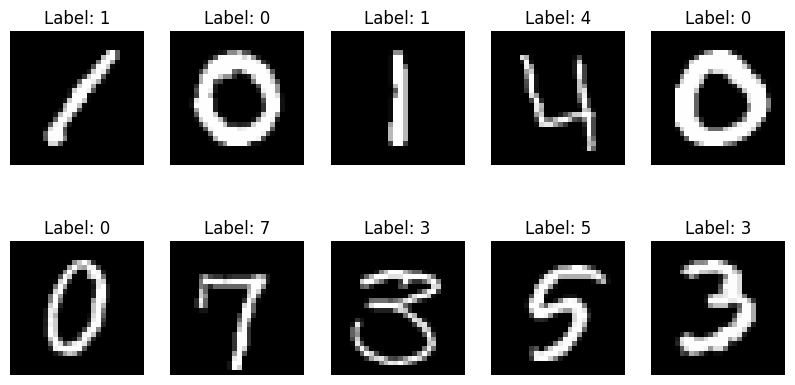

In [12]:
# Visualiser quelques images d'entraînement
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = X_train.iloc[i].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis('off')

plt.show()

In [ ]:
# Séparer les labels (y) des features (X) pour le test
X_test = test_data

# Visualiser quelques images de test
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = X_test.iloc[i].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
# Sélectionner les indices des images correspondant au chiffre 7
indices_sevens = y_train[y_train == 7].index[:9]

# Afficher les 9 premières images correspondant au chiffre 7 dans une seule figure
plt.figure(figsize=(10, 5))
for i, index in enumerate(indices_sevens):
    plt.subplot(3, 3, i + 1)
    img = X_train.iloc[index].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y_train.iloc[index]}")
    plt.axis('off')

plt.show()

In [ ]:
# Calculer les représentants moyens pour chaque chiffre de 0 à 9
mean_digits = []
for digit in range(10):
    # Sélectionner les indices des images correspondant au chiffre
    indices_digit = y_train[y_train == digit].index

    # Calculer la moyenne des images correspondant au chiffre
    mean_img = X_train.iloc[indices_digit].mean().values.reshape(28, 28)
    mean_digits.append(mean_img)

# Afficher les représentants moyens dans une figure
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(mean_digits[i], cmap='gray')
    plt.title(f"Chiffre {i}")
    plt.axis('off')

plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#REGRESSION LOGISTIQUE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle
logistic_regression_model = LogisticRegression()

# Entraîner le modèle
logistic_regression_model.fit(X_train_scaled, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred_logistic = logistic_regression_model.predict(X_test_scaled)

# Évaluer les performances
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

# Afficher les résultats
print("Logistic Regression Accuracy: {:.4f}".format(accuracy_logistic))
print("\nLogistic Regression Classification Report:\n{}".format(report_logistic))


In [ ]:
#ARBRE DE DECISION
from sklearn.tree import DecisionTreeClassifier

# Initialiser le modèle
decision_tree_model = DecisionTreeClassifier()

# Entraîner le modèle
decision_tree_model.fit(X_train_scaled, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

# Évaluer les performances
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
report_decision_tree = classification_report(y_test, y_pred_decision_tree)

# Afficher les résultats
print("Decision Tree Accuracy: {:.4f}".format(accuracy_decision_tree))
print("\nDecision Tree Classification Report:\n{}".format(report_decision_tree))

In [ ]:
#Forêt aléatoire
from sklearn.ensemble import RandomForestClassifier

# Initialiser le modèle
random_forest_model = RandomForestClassifier()

# Entraîner le modèle
random_forest_model.fit(X_train_scaled, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred_random_forest = random_forest_model.predict(X_test_scaled)

# Évaluer les performances
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
report_random_forest = classification_report(y_test, y_pred_random_forest)

# Afficher les résultats
print("Random Forest Accuracy: {:.4f}".format(accuracy_random_forest))
print("\nRandom Forest Classification Report:\n{}".format(report_random_forest))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédire les étiquettes sur l'ensemble de test
y_pred_random_forest = random_forest_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred_random_forest)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Matrice de Confusion - Random Forest')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

In [ ]:
#Machine à Vecteurs de Support (SVM)
from sklearn.svm import SVC

# Initialiser le modèle
svm_model = SVC()

# Entraîner le modèle
svm_model.fit(X_train_scaled, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred_svm = svm_model.predict(X_test_scaled)

# Évaluer les performances
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Afficher les résultats
print("SVM Accuracy: {:.4f}".format(accuracy_svm))
print("\nSVM Classification Report:\n{}".format(report_svm))